# FYP_FUZZY


# 3. Fuzzy Inference System
## 3.1 Membership Function Formulation
Resource: https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html
https://robotics.stackexchange.com/questions/4901/how-to-tune-the-pid-parameters-using-fuzzy-logic


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [50]:
# Define fuzzy input variables
error = ctrl.Antecedent(np.arange(-0.1, 0.1, 0.001), 'error')
error_dot = ctrl.Antecedent(np.arange(-0.1, 0.1, 0.001), 'error_dot')

# Define fuzzy output variable
output = ctrl.Consequent(np.arange(-0.01, 0.01, 0.001), 'output')

# Define membership functions for input variables
error['negative'] = fuzz.trimf(error.universe, [-0.1, -0.1, 0])
error['zero'] = fuzz.trimf(error.universe, [-0.1, 0, 0.1])
error['positive'] = fuzz.trimf(error.universe, [0, 0.1, 0.1])

error_dot['negative'] = fuzz.trimf(error_dot.universe, [-0.1, -0.1, 0])
error_dot['zero'] = fuzz.trimf(error_dot.universe, [-0.1, 0, 0.1])
error_dot['positive'] = fuzz.trimf(error_dot.universe, [0, 0.1, 0.1])

# Define membership functions for output variable
output['negative_large'] = fuzz.trimf(output.universe, [-0.01, -0.01, -0.005])
output['negative_small'] = fuzz.trimf(output.universe, [-0.01, -0.005, 0])
output['zero'] = fuzz.trimf(output.universe, [-0.005, 0, 0.005])
output['positive_small'] = fuzz.trimf(output.universe, [0, 0.005, 0.01])
output['positive_large'] = fuzz.trimf(output.universe, [0.005, 0.01, 0.01])

# Define fuzzy rules
rule1 = ctrl.Rule(error['positive'] & error_dot['positive'], output['negative_large'])
rule2 = ctrl.Rule(error['negative'] & error_dot['negative'], output['positive_large'])
rule3 = ctrl.Rule(error['positive'] & error_dot['negative'], output['positive_small'])
rule4 = ctrl.Rule(error['negative'] & error_dot['positive'], output['negative_small'])
rule5 = ctrl.Rule(error['zero'] & error_dot['zero'], output['zero'])

# Define control system
control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

# Define controller simulation
controller = ctrl.ControlSystemSimulation(control_system)

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


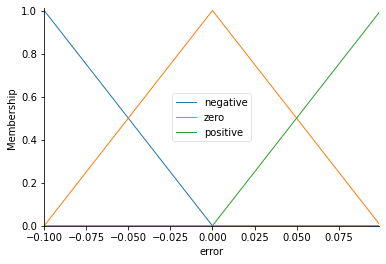

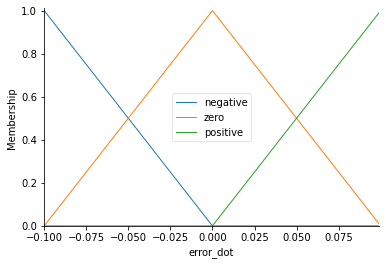

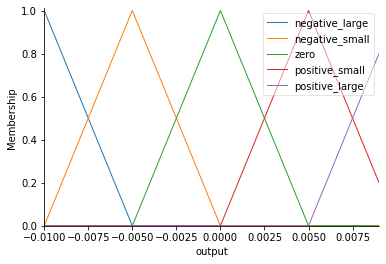

In [51]:
# Plot the membership functions and the output
error.view()
error_dot.view()
output.view()
plt.show()

# Evaluation

In [52]:
# order
# default (0.18, 0.02, 0)
#2 (0.01, 0, 0)
#3 (0.05, 0, 0)
#4 (0.1, 0, 0)
#5 (0.2, 0, 0)
#6 (0.1, 0.01, 0)
#7 (0.1, 0.02, 0)
#8 (0.1, 0.01, 0.01)
#9 (0.1, 0.01, 0.02)
#10 (0.1, 0.01, 0)

altitudeRelative = [-0.407, -0.466, -0.44, -0.397, -0.626, -0.525, -0.520, -0.545, -0.52, -0.458]
altitudeTuningSetpoint = [-0.076, -0.073, -0.027, -0.063, -0.053, -0.112, -0.124, -0.136, -0.124, -0.112]

In [53]:
errors = []
error_dots = []

for i in range(0, 10):
    errors.append(round(altitudeTuningSetpoint[i] - altitudeRelative[i], 3))

error_dots.append(round(altitudeTuningSetpoint[0] - altitudeRelative[0], 3))
for i in range(0, 9):
    for f in range(1, 10):
        final = altitudeTuningSetpoint[f] - altitudeRelative[f]
        initial = altitudeTuningSetpoint[i] - altitudeRelative[i]
        diff = round(final - initial, 3)
    error_dots.append(diff)

In [54]:
errors

[0.331, 0.393, 0.413, 0.334, 0.573, 0.413, 0.396, 0.409, 0.396, 0.346]

In [55]:
error_dots

[0.331, 0.015, -0.047, -0.067, 0.012, -0.227, -0.067, -0.05, -0.063, -0.05]

Case # 0 : error( 0.331 ), error_dot( 0.331 )
-0.00801417235741084
Case # 1 : error( 0.393 ), error_dot( 0.015 )
-0.00671879924361815
Case # 2 : error( 0.413 ), error_dot( -0.047 )
0.0047664471985541055
Case # 3 : error( 0.334 ), error_dot( -0.067 )
0.004811990061032076
Case # 4 : error( 0.573 ), error_dot( 0.012 )
-0.006500075357950402
Case # 5 : error( 0.413 ), error_dot( -0.227 )
0.004911555600911654
Case # 6 : error( 0.396 ), error_dot( -0.067 )
0.004811990061032076
Case # 7 : error( 0.409 ), error_dot( -0.05 )
0.004776187102143657
Case # 8 : error( 0.396 ), error_dot( -0.063 )
0.004805826161622086
Case # 9 : error( 0.346 ), error_dot( -0.05 )
0.004776187102143657


C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvari

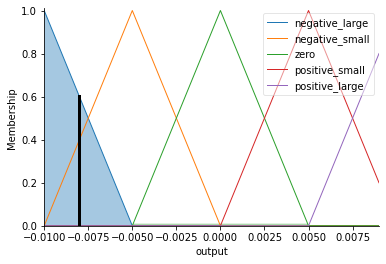

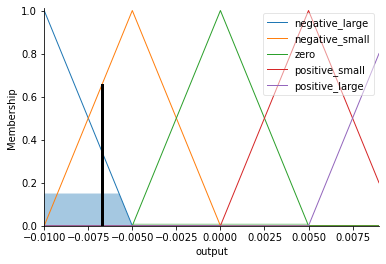

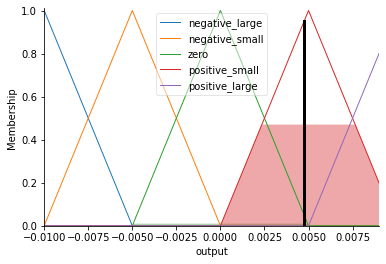

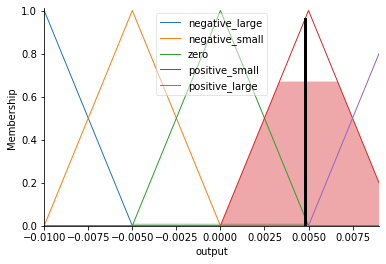

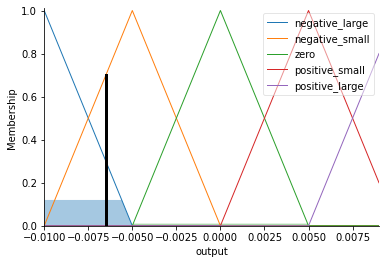

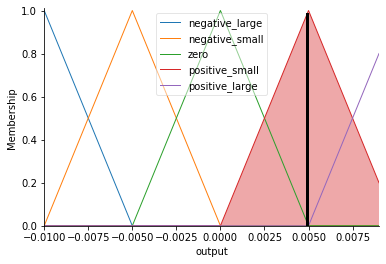

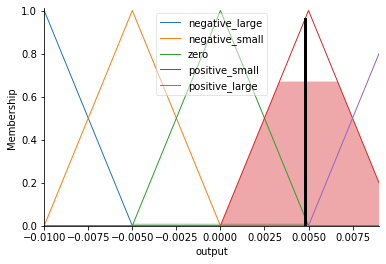

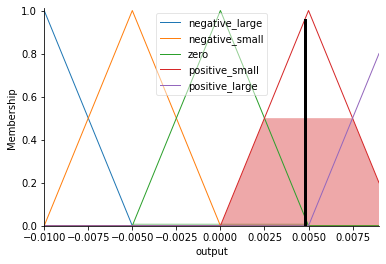

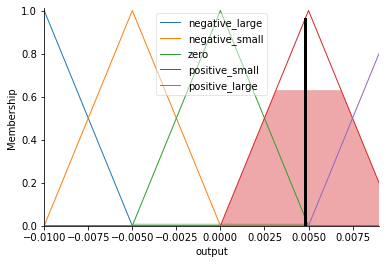

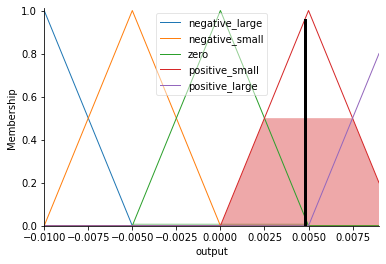

In [60]:
# Use controller to compute output
outputs = []

for i in range(0, 10):
    controller.input['error'] = errors[i]
    controller.input['error_dot'] = error_dots[i]
    controller.compute()
    result = controller.output['output']
    outputs.append(round(result, 8))
    print("Case #", i, ": error(", errors[i], "), error_dot(", error_dots[i], ")")
    print(result)
    output.view(sim = controller)


In [57]:
outputs

[-0.00801417,
 -0.0067188,
 0.00476645,
 0.00481199,
 -0.00650008,
 0.00491156,
 0.00481199,
 0.00477619,
 0.00480583,
 0.00477619]

-0.00801417235741084


C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 432x288 with 0 Axes>

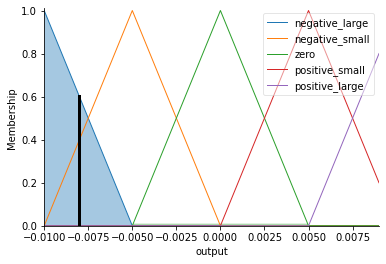

In [58]:
# Default Case

controller.input['error'] = errors[0]
controller.input['error_dot'] = error_dots[0]
controller.compute()

print(controller.output['output'])
plt.figure()
output.view(sim = controller)
plt.show()

0.004776187102143657


C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 432x288 with 0 Axes>

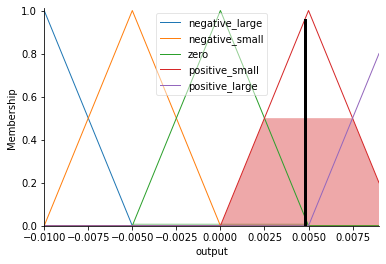

In [59]:
# Our tuned parameter case

controller.input['error'] = errors[9]
controller.input['error_dot'] = error_dots[9]
controller.compute()

print(controller.output['output'])
plt.figure()
output.view(sim = controller)
plt.show()